<a href="https://colab.research.google.com/github/zie225/Machine-Leaning-project/blob/master/FINAL_NATURAL_LANGAGE_PROCESSING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import ast

import pandas as pd
import numpy as np
from collections import defaultdict
import collections
import gensim

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.preprocessing import MultiLabelBinarizer 
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.multioutput import MultiOutputClassifier                  # included from scikit-learn version 0.18.1 and onwards
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import json
import numpy as np
import pandas as pd
import gensim
import networkx as nx
import collections

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re 
from collections import Counter
from pprint import pprint
from gensim.models import CoherenceModel
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# Plotting tools

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# for Mac
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt') # one time execution
import re

import re
import os
import time
import numpy as np
import pandas as pd 
import unicodedata
import tensorflow as tf
import tensorflow.keras as krs
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
import csv

BUFFER_SIZE = 20000
BATCH_SIZE = 64
embedding_dim = 50 # first it was 200

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.feature_extraction import stop_words
import re
import string
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys, tarfile
from sklearn.model_selection import train_test_split

from IPython.display import Image
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from keras.utils.vis_utils import plot_model
from keras.preprocessing.text import Tokenizer,text_to_word_sequence 
from keras.preprocessing.sequence import pad_sequences
#from keras.layers import Input,Dense, Activation, concatenate, Embedding, Flatten, CuDNNLSTM, Bidirectional, Concatenate
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K
from keras import optimizers
pd.set_option('display.max_colwidth', 200)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
parsed_sites = 'AgrSmall.json'

with open(parsed_sites, "r") as read_file:
    abstract_dict = json.load(read_file)

In [13]:
df= pd.DataFrame.from_dict(abstract_dict)
df.head()

,doi,titles,abstracts,authors,keywords,sources
0,10.3390,Community Faecal Management Strategies and Perceptions on Sludge Use in Agriculture,Most people in rural areas in South Africa (SA) rely on untreated drinking groundwater sources and pit latrine sanitations. A minimum basic sanitation facility should enable safe and appropriate r...,"[Matthew Mamera, Johan J. van Tol, Makhosazana P. Aghoghovwia, Gabriel T. Mapetere]",agriculture,mdpi
1,10.3390,Adoption of Sustainable Agriculture Practices in Banana Farm Production: A Study from the Sindh Region of Pakistan,"The aim of this study was to highlight the importance of socioeconomic and psychosocial factors in the adoption of sustainable agricultural practices (SAPs) in banana farm production. To this end,...","[Rafay Waseem, Gershom Endelani Mwalupaso, Faria Waseem, Humayoon Khan, Ghulam Mustafa Panhwar, Yangyan Shi]",agriculture,mdpi
2,10.3390,Atlanta Residents’ Knowledge Regarding Heavy Metal Exposures and Remediation in Urban Agriculture,"Urban agriculture and gardening provide many health benefits, but the soil is sometimes at risk of heavy metal and metalloid (HMM) contamination. HMM, such as lead and arsenic, can result in adver...","[Lauren Balotin, Samantha Distler, Antoinette Williams, Samuel J.W. Peters, Candis M. Hunter, Chris Theal, Gil Frank, Taranji Alvarado, Rosario Hernandez, Arthur Hines, Eri Saikawa]",agriculture,mdpi
3,10.3390,Perceptions of the Challenges and Opportunities of Utilising Organic Waste through Urban Agriculture in the Durban South Basin,"Waste management has become pertinent in urban regions, along with rapid population growth. The current ways of managing waste, such as refuse collection and recycling, are failing to minimise was...","[Nqubeko Neville Menyuka, Melusi Sibanda, Urmilla Bob]",agriculture,mdpi
4,10.3390,An Assessment of Seaweed Extracts: Innovation for Sustainable Agriculture,Plant growth regulators (PGRs) are described in the literature as having a significant role in securing crop management of modern agriculture in conditions of abiotic and biotic stressors. A joint...,"[El Chami Daniel, Galli Fabio]",agriculture,mdpi


In [14]:
#from sklearn.utils import shuffle
# shuffling the data 
#df= shuffle(df)
#df.head()

In [15]:
df=df[df['abstracts'].isnull()==False]
df=df[df['titles'].isnull()==False]
df=df[df['abstracts']!='nan']

df.drop_duplicates(subset=['abstracts'],inplace=True)  #dropping duplicates

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    str = text.lower()
    str = BeautifulSoup(str, "lxml").text
    str = re.sub(r'\([^)]*\)', '', str)
    str = re.sub('"','', str)
    str = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in str.split(" ")])    
    str = re.sub(r"'s\b","",str)
    str = re.sub("[^a-zA-Z]", " ", str) 
    str = re.sub('[m]{2,}', 'mm', str)
    if(num==0):
        str = re.sub(r'\.',' . ',str)
    if(num==0):
        tokens = [w for w in str.split() if not w in stop_words]
      
    else:
        
        tokens=str.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short words
            long_words.append(i)
    return (" ".join(long_words)).strip()

In [18]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have","mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as","this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

In [19]:
#call the function
clean_text = []
for t in df['titles']:
    clean_text.append(text_cleaner(t,0))

In [20]:
#call the function
clean_summary = []
for t in df['abstracts']:
    clean_summary.append(text_cleaner(t,0))

In [21]:
df['titles']=clean_text
df['abstracts']=clean_summary

df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

In [22]:
df.head()

,doi,titles,abstracts,authors,keywords,sources
0,10.3390,community faecal management strategies perceptions sludge use agriculture,people rural areas south africa rely untreated drinking groundwater sources pit latrine sanitations minimum basic sanitation facility enable safe appropriate removal human waste although pit latri...,"[Matthew Mamera, Johan J. van Tol, Makhosazana P. Aghoghovwia, Gabriel T. Mapetere]",agriculture,mdpi
1,10.3390,adoption sustainable agriculture practices banana farm production study sindh region pakistan,aim study highlight importance socioeconomic psychosocial factors adoption sustainable agricultural practices banana farm production end data randomly selected farm households pakistan collected s...,"[Rafay Waseem, Gershom Endelani Mwalupaso, Faria Waseem, Humayoon Khan, Ghulam Mustafa Panhwar, Yangyan Shi]",agriculture,mdpi
2,10.3390,atlanta residents knowledge regarding heavy metal exposures remediation urban agriculture,urban agriculture gardening provide many health benefits soil sometimes risk heavy metal metalloid contamination hmm lead arsenic result adverse health effects humans gardeners may face exposure c...,"[Lauren Balotin, Samantha Distler, Antoinette Williams, Samuel J.W. Peters, Candis M. Hunter, Chris Theal, Gil Frank, Taranji Alvarado, Rosario Hernandez, Arthur Hines, Eri Saikawa]",agriculture,mdpi
3,10.3390,perceptions challenges opportunities utilising organic waste urban agriculture durban south basin,waste management become pertinent urban regions along rapid population growth current ways managing waste refuse collection recycling failing minimise waste cities urban populations growing worldw...,"[Nqubeko Neville Menyuka, Melusi Sibanda, Urmilla Bob]",agriculture,mdpi
4,10.3390,assessment seaweed extracts innovation sustainable agriculture,plant growth regulators described literature significant role securing crop management modern agriculture conditions abiotic biotic stressors joint field experiment carried assess role seaweed bas...,"[El Chami Daniel, Galli Fabio]",agriculture,mdpi


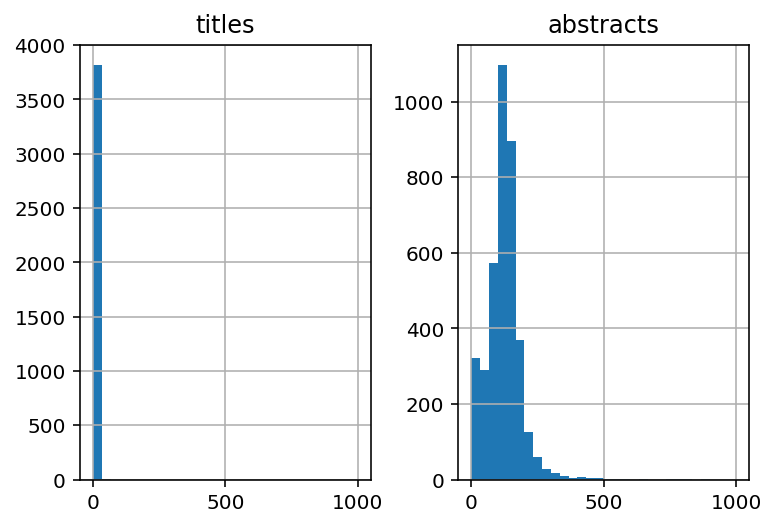

In [23]:
import matplotlib.pyplot as plt
text_word_count = []
headline_word_count = []

# populate the lists with sentence lengths
for i in df['titles']:
    temp=i.split()
    text_word_count.append(len(temp))

for j in df['abstracts']:
  #print(j)
    temp1=j.split()
    headline_word_count.append(len(temp1))

length_df = pd.DataFrame({'titles':text_word_count, 'abstracts':headline_word_count})
length_df.hist(bins = 30,range=[0,1000])
plt.show()

In [24]:
# From the graph
# We can fix maximum length of text = 150 since most of the abstracts have a length of 150 and maximum titles length of 50, since maximum headlines are of size 40

max_len_abstracts= 150
max_len_titles=50

In [25]:
cnt=0
for i in df['abstracts']:
    if(len(i.split())<=150):
        cnt=cnt+1
print(cnt/len(df['abstracts']))

0.7318479685452163


In [26]:
titles1 =np.array(df['titles'])
abstracts1=np.array(df['abstracts'])

short_titles=[]
short_summary=[]

for i in range(len(titles1)):
    if(len(abstracts1[i].split())<=50 and len(titles1[i].split())<=150):
        short_titles.append(titles1[i])
        short_summary.append(abstracts1[i])
        
df=pd.DataFrame({'titles':short_titles,'summary':short_summary})

In [27]:
# Validating the lengths

titles1 =np.array(df['titles'])
abstract1=np.array(df['summary'])


for i in range(len(titles1)):
    if(len(abstract1[i].split())>=150):
        print(i)

In [28]:
print(df['titles'][400],df['summary'][400],sep='\n')

urban agriculture small farm water use case studies trends cache valley utah
highlights large heterogeneity water use practices among urban small farms small fields lower uniformities greater depths large fields surface irrigated fields apply higher depths sprinkle drip fields fields relying set schedule higher depths fields without irrigators need better awareness importance management efficiency


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['titles'],df['summary'],test_size=0.3,random_state=0,shuffle=True)

In [30]:
print(len(x_train))
print(len(x_test))

356
153


In [31]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [33]:
def readLangs(titles, summary, reverse=False):
    print("Reading lines...")
    
    # Split every line into pairs and normalize
    titles=np.array(titles)
    summary=np.array(summary)
    pairs = [[titles[i],summary[i]] for i in range(len(summary))]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(titles)
        output_lang = Lang(summary)
    else:
        input_lang = Lang(summary)
        output_lang = Lang(titles)

    return input_lang, output_lang, pairs

In [34]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name,"--------------------", input_lang.n_words)
    #print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

In [35]:
input_lang, output_lang, pairs = prepareData(x_train, y_train , False)
#print(random.choice(pairs))

Reading lines...
Read 356 sentence pairs
Counting words...
Counted words:
['highlights exogenous application hydrogen rich water ameliorates detrimental effects salinity barley amelioration explained higher rate na extrusion mediated sos like na exchanger root epidermis hrw treated plants prevented nacl induced membrane depolarization reduced sensitivity efflux channels ros'
 'purpose paper introduce mandelbrot julia sets using picard mann iteration procedure escape criteria established plays important role generate mandelbrot julia sets also numerous graphical pictures sets visualized certain examples recognized presented results shows fractal images generated picard mann iteration procedure entirely different generated mann orbit'
 'highlights microwave altered properties isolated kernel hull less barley starches disrupted crystalline region greater kernel starches peak viscosity kernel starches decreased microwaving increased amylose plays profound role properties microwaved starch'

In [36]:
pairs[1]

['andelbrot sets julia sets picard mann orbit',
 'purpose paper introduce mandelbrot julia sets using picard mann iteration procedure escape criteria established plays important role generate mandelbrot julia sets also numerous graphical pictures sets visualized certain examples recognized presented results shows fractal images generated picard mann iteration procedure entirely different generated mann orbit']

In [37]:
pairs[2]

['icrowave irradiation differentially affect physicochemical properties waxy non waxy hull less barley starch',
 'highlights microwave altered properties isolated kernel hull less barley starches disrupted crystalline region greater kernel starches peak viscosity kernel starches decreased microwaving increased amylose plays profound role properties microwaved starch']

In [38]:
SOS_token = 0
EOS_token = 1

In [39]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [40]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [41]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.LSTM = nn.LSTM(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.LSTM(output, hidden)
        return output, hidden

    def initHidden(self):
        return (torch.zeros(1, 1, self.hidden_size, device=device),torch.zeros(1, 1, self.hidden_size, device=device))

In [42]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.LSTM = nn.LSTM(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.LSTM(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [43]:
MAX_LENGTH=150

In [44]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size*2 , self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size*2 , self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.LSTM = nn.LSTM(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

        #print('Decoder --- atndecoder')

    def forward(self, input, hidden, encoder_outputs):
        #print("inside forward decoder")
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        #print("embedded size", embedded.size())
        #print(embedded[0].size()) #1,300
        #print(hidden[0].size()) # 1, 1, 300
        #print("diff or not")

        #temp = torch.cat((embedded[0], hidden[0]), 1)
        
        #print(temp)
        #print(temp.size())

        attn_weights = F.softmax(self.attn(torch.cat((embedded[0], hidden[0][0]), 1)), dim=1)
        #print("after getting attn weights softmax")
        #print(attn_weights.size())
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.LSTM(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [45]:
#teacher_forcing_ratio = 0.5
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0
    #print('bbbbbbb-->>> input length', input_length)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        #print("priting before error")
        #print(encoder_output.size())
        #print(encoder_outputs.size())
        temp = encoder_output[0, 0]
        #print(temp)
        encoder_outputs[ei] = temp

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    #use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
    #Without teacher forcing: use its own predictions as the next input

    #print('aaaaa-->>>')

    for di in range(target_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(
        decoder_input, decoder_hidden, encoder_outputs)


        topv, topi = decoder_output.topk(1)
      
        decoder_input = topi.squeeze().detach()  # detach from history as input
      
        loss += criterion(decoder_output, target_tensor[di])
      
        if decoder_input.item() == EOS_token:
            break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [46]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [47]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [48]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    print("Training....")
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        if iter% 1000 == 0:
            print(iter,"/",n_iters + 1)
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        input_length = input_tensor.size(0)
        if(input_length > 150):
          #print(input_length)
          continue
      
        loss = train(input_tensor, target_tensor, encoder,decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [49]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        #print('cccccc->>>>')

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [64]:
def evaluateRandomly(encoder, decoder, n=5):
    titles=list()
    abstracts=list()
    pred_abstracts=list()    
    for i in range(n):
        pair = random.choice(pairs)
        
        if(len(pair[0].split())>=150):
            continue
        else:
            if(i%1000==0):
                print(i*100/n,"% complete")
          
            #print('>', pair[0])
            titles.append(pair[0])
          #print('=', pair[1])
            abstracts.append(pair[1])
            output_words, attentions = evaluate(encoder, decoder, pair[0])
            output_sentence = ' '.join(output_words)
            pred_abstracts.append(output_sentence)
            #print('<', output_sentence)
            #print('')
    return(titles,abstracts,pred_abstracts)

Training....
1000 / 150001
1m 47s (- 267m 34s) (1000 0%) 1.4212
2000 / 150001
3m 35s (- 266m 23s) (2000 1%) 1.4643
3000 / 150001
5m 50s (- 285m 53s) (3000 2%) 1.9789
4000 / 150001
8m 33s (- 312m 24s) (4000 2%) 2.5177
5000 / 150001
11m 43s (- 340m 11s) (5000 3%) 2.9550
6000 / 150001
15m 22s (- 368m 53s) (6000 4%) 3.0386
7000 / 150001
19m 25s (- 396m 52s) (7000 4%) 3.0564
8000 / 150001
23m 48s (- 422m 33s) (8000 5%) 2.7528
9000 / 150001
28m 26s (- 445m 34s) (9000 6%) 2.5496
10000 / 150001
33m 12s (- 464m 57s) (10000 6%) 2.1339
11000 / 150001
38m 16s (- 483m 35s) (11000 7%) 1.9688
12000 / 150001
43m 29s (- 500m 9s) (12000 8%) 1.7596
13000 / 150001
48m 51s (- 514m 57s) (13000 8%) 1.6460
14000 / 150001
54m 14s (- 526m 53s) (14000 9%) 1.5070
15000 / 150001
59m 41s (- 537m 9s) (15000 10%) 1.3826
16000 / 150001
65m 8s (- 545m 32s) (16000 10%) 1.2741
17000 / 150001
70m 33s (- 552m 2s) (17000 11%) 1.2620
18000 / 150001
76m 7s (- 558m 12s) (18000 12%) 1.1786
19000 / 150001
81m 39s (- 562m 58s) (1

<Figure size 432x288 with 0 Axes>

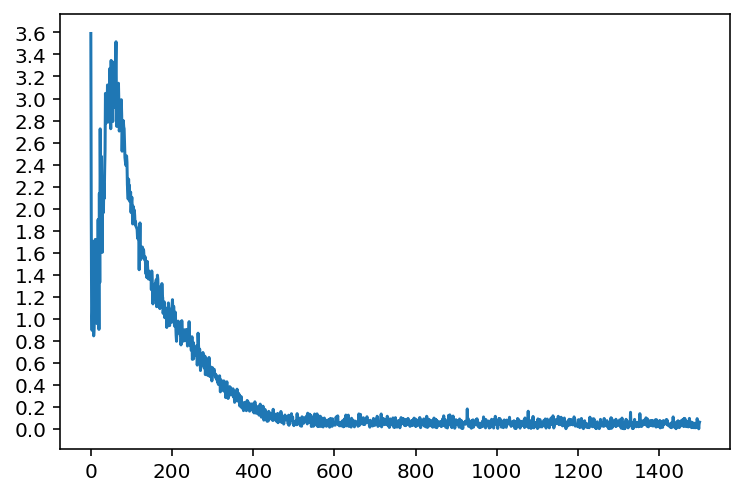

In [51]:
hidden_size = 300
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 150000, print_every=1000)

In [65]:
titles,abstracts,pred_abstracts=evaluateRandomly(encoder1, attn_decoder1,15000)

pred_df_LSTM=pd.DataFrame()

pred_df_LSTM['titles']=titles
pred_df_LSTM['abstracts']=abstracts
pred_df_LSTM['pred_abstracts']=pred_abstracts

0.0 % complete
6.666666666666667 % complete
13.333333333333334 % complete
20.0 % complete
26.666666666666668 % complete
33.333333333333336 % complete
40.0 % complete
46.666666666666664 % complete
53.333333333333336 % complete
60.0 % complete
66.66666666666667 % complete
73.33333333333333 % complete
80.0 % complete
86.66666666666667 % complete
93.33333333333333 % complete


In [66]:
for i in range(105,110):
    print("original Summary>>>",pred_df_LSTM.iloc[i]['abstracts'])
    print("Predicted Summary>>>",pred_df_LSTM.iloc[i]['pred_abstracts'])
    print('-----------------------------------------------------------------------')

original Summary>>> introduction rapid population growth developing countries means food required meet demands growing populations rain fed wheat barley major grain crops
Predicted Summary>>> introduction rapid population growth developing countries means food required meet demands growing populations rain fed wheat barley major grain crops <EOS>
-----------------------------------------------------------------------
original Summary>>> highlights nir hsi cognize chemical component differences spatial distribution enhancing interpretability nir spectral images via pca svm analysis cnn deep learning utilized cognize viable non viable seeds approximately viability prediction accuracy naturally aged seeds quality individual seeds could assessed nondestructively rapidly
Predicted Summary>>> highlights nir hsi cognize chemical component differences spatial distribution enhancing interpretability nir spectral images via pca svm analysis cnn deep learning utilized cognize viable non viable se